# 1. Import and Install Dependencies

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
# Initialize Mediapipe Holistic model and Drawing utilities
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh  # For face landmark connections

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image.flags.writeable = False                   # Image is no longer writeable
    results = model.process(image)                  # Make prediction
    image.flags.writeable = True                    # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert RGB back to BGR
    return image, results

In [4]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.face_landmarks, 
            mp_face_mesh.FACEMESH_TESSELATION,  # ✅ Use mp_face_mesh instead
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )

    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )

    # Draw left-hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(111,2,36), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(141,24,220), thickness=2, circle_radius=2)
        )

    # Draw right-hand connections
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

In [5]:
cap = cv2.VideoCapture(0)

# Set Mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read webcam frame
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame.")
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show frame
        cv2.imshow('OpenCV Feed', image)

        # Exit on 'q' key press
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [6]:
draw_styled_landmarks(frame, results)

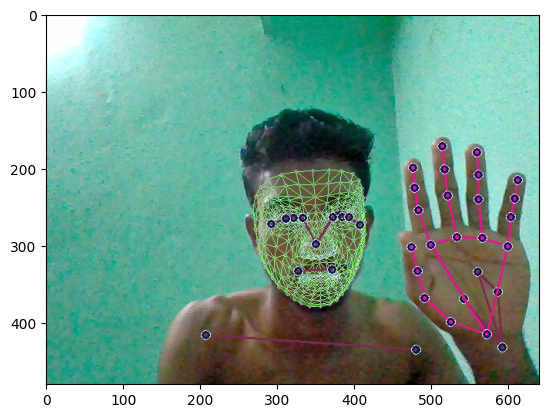

In [7]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [8]:
len(results.left_hand_landmarks.landmark)

21

In [9]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [10]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [11]:
lh.shape

(63,)

In [12]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.54702091,  0.6223166 , -0.91052961, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
#file name=0,array=result_test as .npy file
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.54702091,  0.6223166 , -0.91052961, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [18]:
import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou', 'leftside', 'ok', 'highfive', 'crying', 'greeting', 'punch'])

# Number of sequences
no_sequences = 30
sequence_length = 30

# Ensure directory exists before reading
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    os.makedirs(action_path, exist_ok=True)  # Ensure the path exists

    # Find the max existing folder number
    existing_folders = [int(folder) for folder in os.listdir(action_path) if folder.isdigit()]
    dirmax = max(existing_folders) if existing_folders else 0

    # Folder start should continue from the last index + 1
    start_folder = dirmax + 1

    print(f"Action: {action}, Existing max folder: {dirmax}, Start folder: {start_folder}")

    # Create only missing folders
    for sequence in range(start_folder, start_folder + no_sequences):
        os.makedirs(os.path.join(action_path, str(sequence)), exist_ok=True)


Action: hello, Existing max folder: 30, Start folder: 31
Action: thanks, Existing max folder: 30, Start folder: 31
Action: iloveyou, Existing max folder: 30, Start folder: 31
Action: leftside, Existing max folder: 30, Start folder: 31
Action: ok, Existing max folder: 30, Start folder: 31
Action: highfive, Existing max folder: 30, Start folder: 31
Action: crying, Existing max folder: 30, Start folder: 31
Action: greeting, Existing max folder: 30, Start folder: 31
Action: punch, Existing max folder: 30, Start folder: 31


# 5. Collect Keypoint Values for Training and Testing

In [18]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                # Ensure the directory exists
                if not os.path.exists(os.path.dirname(npy_path)):
                    os.makedirs(os.path.dirname(npy_path))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label:num for num, label in enumerate(actions)}

In [21]:
label_map

{'hello': 0,
 'thanks': 1,
 'iloveyou': 2,
 'leftside': 3,
 'ok': 4,
 'highfive': 5,
 'crying': 6,
 'greeting': 7,
 'punch': 8}

In [22]:
import os
import numpy as np

sequences, labels = [], []
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        print(f"Action folder not found: {action_path}")
        continue

    for sequence in np.array(os.listdir(action_path)).astype(int):
        sequence_path = os.path.join(action_path, str(sequence))
        if not os.path.exists(sequence_path):
            print(f"Sequence folder not found: {sequence_path}")
            continue

        window = []
        for frame_num in range(sequence_length):
            file_path = os.path.join(sequence_path, f"{frame_num}.npy")  # ✅ FIXED FILE PATH
            
            if os.path.exists(file_path):
                res = np.load(file_path)
                window.append(res)
            else:
                print(f"File not found: {file_path}")  # Debugging print statement

        if len(window) == sequence_length:  # Ensure complete sequences
            sequences.append(window)
            labels.append(label_map[action])


File not found: MP_Data\iloveyou\31\0.npy
File not found: MP_Data\iloveyou\31\1.npy
File not found: MP_Data\iloveyou\31\2.npy
File not found: MP_Data\iloveyou\31\3.npy
File not found: MP_Data\iloveyou\31\4.npy
File not found: MP_Data\iloveyou\31\5.npy
File not found: MP_Data\iloveyou\31\6.npy
File not found: MP_Data\iloveyou\31\7.npy
File not found: MP_Data\iloveyou\31\8.npy
File not found: MP_Data\iloveyou\31\9.npy
File not found: MP_Data\iloveyou\31\10.npy
File not found: MP_Data\iloveyou\31\11.npy
File not found: MP_Data\iloveyou\31\12.npy
File not found: MP_Data\iloveyou\31\13.npy
File not found: MP_Data\iloveyou\31\14.npy
File not found: MP_Data\iloveyou\31\15.npy
File not found: MP_Data\iloveyou\31\16.npy
File not found: MP_Data\iloveyou\31\17.npy
File not found: MP_Data\iloveyou\31\18.npy
File not found: MP_Data\iloveyou\31\19.npy
File not found: MP_Data\iloveyou\31\20.npy
File not found: MP_Data\iloveyou\31\21.npy
File not found: MP_Data\iloveyou\31\22.npy
File not found: MP_Da

In [23]:
np.array(sequences).shape

(270, 30, 1662)

In [24]:
np.array(labels).shape

(270,)

In [25]:
X = np.array(sequences)

In [26]:
X.shape

(270, 30, 1662)

In [27]:
y = to_categorical(labels).astype(int)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [29]:
y_test.shape

(14, 9)

# 7. Build and Train LSTM Neural Network

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam

In [31]:
from tensorflow.keras.callbacks import TensorBoard

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [93]:
model = Sequential()

# First LSTM layer with Bidirectional wrapper
model.add(Bidirectional(LSTM(256, return_sequences=True, activation='relu'), input_shape=(30, 1662)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Second LSTM layer
model.add(Bidirectional(LSTM(128, return_sequences=False, activation='relu')))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Dense layers for feature extraction
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(len(actions), activation='softmax'))


In [94]:
from tensorflow.keras.optimizers.legacy import Adam

# Compile the model
optimizer = Adam(learning_rate=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [71]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
8/8 [==============================] - 5s 298ms/step - loss: 2.9367 - accuracy: 0.1445
Epoch 2/2000
8/8 [==============================] - 2s 271ms/step - loss: 2.8228 - accuracy: 0.1484
Epoch 3/2000
8/8 [==============================] - 2s 294ms/step - loss: 2.8061 - accuracy: 0.0977
Epoch 4/2000
8/8 [==============================] - 2s 278ms/step - loss: 2.7142 - accuracy: 0.1289
Epoch 5/2000
8/8 [==============================] - 2s 275ms/step - loss: 2.6464 - accuracy: 0.1172
Epoch 6/2000
8/8 [==============================] - 2s 275ms/step - loss: 2.5340 - accuracy: 0.1406
Epoch 7/2000
8/8 [==============================] - 2s 276ms/step - loss: 2.4096 - accuracy: 0.1289
Epoch 8/2000
8/8 [==============================] - 2s 299ms/step - loss: 2.3350 - accuracy: 0.1680
Epoch 9/2000
8/8 [==============================] - 2s 274ms/step - loss: 2.3450 - accuracy: 0.1602
Epoch 10/2000
8/8 [==============================] - 2s 282ms/step - loss: 2.3565 - accuracy: 0.1523

KeyboardInterrupt: 

In [95]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirecti  (None, 30, 512)           3930112   
 onal)                                                           
                                                                 
 batch_normalization_8 (Bat  (None, 30, 512)           2048      
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 30, 512)           0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 256)               656384    
 onal)                                                           
                                                                 
 batch_normalization_9 (Bat  (None, 256)               1024      
 chNormalization)                                     

# 8. Make Predictions

In [97]:
res = model.predict(X_test)

1/1 [==============================] - 0s 475ms/step


In [98]:
actions[np.argmax(res[3])]

'hello'

In [99]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [76]:
model.save('action.h5')

c:\Users\saiga\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [92]:
del model

In [96]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [100]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [101]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 47ms/step


In [102]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [103]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[11,  1],
        [ 0,  2]],

       [[13,  1],
        [ 0,  0]],

       [[12,  0],
        [ 2,  0]],

       [[12,  0],
        [ 2,  0]],

       [[13,  1],
        [ 0,  0]],

       [[13,  0],
        [ 0,  1]],

       [[ 8,  3],
        [ 0,  3]],

       [[11,  0],
        [ 1,  2]],

       [[13,  0],
        [ 1,  0]]], dtype=int64)

In [105]:
accuracy_score(ytrue, yhat)

0.5714285714285714

# 11. Test in Real Time

In [87]:
from scipy import stats

In [88]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()

    # Ensure res doesn't exceed actions length
    num_classes = min(len(res), len(actions), len(colors))  # Prevent index errors

    for num in range(num_classes):
        prob = res[num]  # Safely access res within bounds
        cv2.rectangle(output_frame, (0, 60 + num * 40), 
                      (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    return output_frame


In [89]:
# This cell is intentionally left blank to move the plotting code after CELL INDEX 62

In [90]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

# Define colors for visualization
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (245, 16, 117), (117, 16, 245), (16, 245, 117), (245, 245, 16), (16, 245, 245), (245, 16, 245)]

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions[:len(res)], image, colors[:len(res)])

            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti